In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from skbio.stats.composition import ilr,clr,alr
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame(pd.read_csv("./soci_econ_country.csv"))
df.head()

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),...,"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,...,NaN,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,1,Australia,Oceania,7692060,24451,3.2,99.3,1230859,2.4,51352.2,...,1.948647,84.600,80.500,82.500000,2.007966,12349632.0,12252228.0,21.915859,64.110306,85.904
2,2,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,...,2.081269,84.000,79.400,81.643902,0.756179,4478340.0,4319226.0,25.355237,27.024073,58.094
3,3,Belarus,EasternEurope,207600,9468,46.7,87.0,54609,-3.9,5750.8,...,6.031837,79.200,69.300,74.129268,1.162417,5077542.0,4420722.0,13.019006,2.933101,78.134
4,4,Belgium,WesternEurope,30528,11429,377.5,97.3,455107,1.5,40277.8,...,2.125971,83.900,79.200,81.492683,0.910371,5766141.0,5609017.0,23.399721,33.727746,97.961


In [46]:
# Xác định các biến thành phần độc lập và biến giải thích
compositional_cols = ['Total Fossil Fuels Production','Nuclear Electric Power Production','Total Renewable Energy Production']
compositional_cols_consumption = ['Total Fossil Fuels Consumption','Nuclear Electric Power Consumption','Total Renewable Energy Consumption']

#data = 
var_target = df['Total Primary Energy Consumption']
#family = family[(family != 0).all(axis=1)]

# chuyển dữ liệu thành phần
compositional_data = df[compositional_cols]
#compositional_data = compositional_data.div(compositional_data.sum(axis=1), axis=0)
compositional_data.head()


,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production
0,4.932632,0.068103,0.403981
1,4.729582,0.064634,0.360900
2,4.946902,0.072494,0.400161
3,4.716271,0.064070,0.380470
4,4.956995,0.062111,0.392141


In [47]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(compositional_data, var_target, test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính với kiểm tra chéo
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')  # Sửa lỗi 'neg_mean_squared_error'

# Huấn luyện mô hình trên toàn bộ tập huấn luyện
model.fit(X_train, y_train)  # Bỏ bước huấn luyện riêng trên tập train

# In ra các tham số của mô hình
print("Độ chặn:", model.intercept_)
print("Hệ số hồi quy:", model.coef_)

Độ chặn: 4.599322478306034
Hệ số hồi quy: [ 0.20771975  4.20379693 -0.65512035]


In [48]:
# In mô hình ra console
print("CV RMSE scores:", np.sqrt(-cv_scores))
print("Mean CV RMSE:", np.sqrt(-cv_scores).mean())

CV RMSE scores: [0.50940472 0.52255302 0.49288191 0.43494646 0.46485933 0.45682963
 0.59349436 0.43728227 0.46489521 0.42437377]
Mean CV RMSE: 0.48015206651016074


In [49]:
# Tính tầm quan trọng của các biến
importance = model.coef_
var_importance = pd.DataFrame({'Variables': compositional_cols, 'Importance': importance})
var_importance = var_importance.sort_values(by='Importance', ascending=False)

In [50]:
# Hàm để vẽ tầm quan trọng của các biến
def plot_importance(var_importance):
    var_importance['Rank'] = var_importance['Importance'].rank(ascending=False)
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Variables', data=var_importance, palette='coolwarm')
    for index, row in var_importance.iterrows():
        plt.text(row['Importance'], index, f"#{int(row['Rank'])}", color='black', ha="left", va="center")
    plt.title('Relative Variable Importance')
    plt.show()

/tmp/ipykernel_11191/2445877765.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variables', data=var_importance, palette='coolwarm')


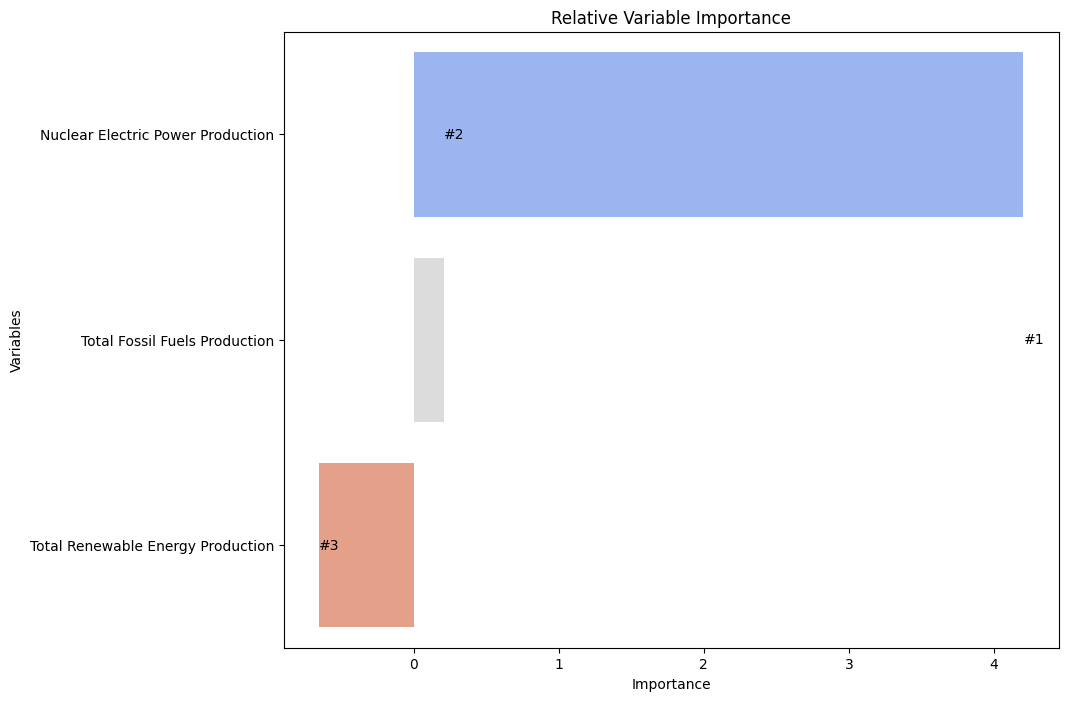

In [51]:
plot_importance(var_importance)

In [53]:
# Dự đoán cho tập kiểm tra
pred = model.predict(X_test)

# In ra console các giá trị dự đoán
print(pred)

[6.39583295 8.40574551 8.67240218 6.05166548 7.17671445 7.66960238
 5.75043205 7.98902893 6.21332768 7.96179316 6.36625238 6.32455914
 6.20053688 8.38310015 7.93376326 7.73872135 5.96317747 7.43664969
 7.07802106 6.28019481 5.66948817 8.0509253  8.31850266 8.39980733
 8.05680245 8.17747748 6.56207996 6.3329049  7.95965324 8.18384288
 8.31396549 6.91956447 6.23591426 7.53764634 7.3652857  7.96547203
 6.59526322 8.25813881 7.72678237 7.85466975 7.94221174 5.86555801
 8.14888956 8.09338744 5.97017035 7.30566725 7.9953298  6.51568384
 6.10081769 8.07009859 7.54707784 7.45700813 6.22571041 8.1853109
 7.99171716 8.10666408 7.31010037 6.88448303 6.39560065 6.71977917
 5.99992492 7.03476579 8.20308191 8.43139777 8.541848   6.5049876
 8.31189247 8.33848706 6.37200593 7.63721647 7.51270663 5.66401725
 7.71584839 8.0390811  8.01382338 8.21445492 8.10553866 7.48695973
 8.52402198 8.46353206 7.53092252 8.47473159 7.99620356 7.88261025
 6.44420649 5.79295436 6.78488147 7.46032628 7.8427635  7.634224

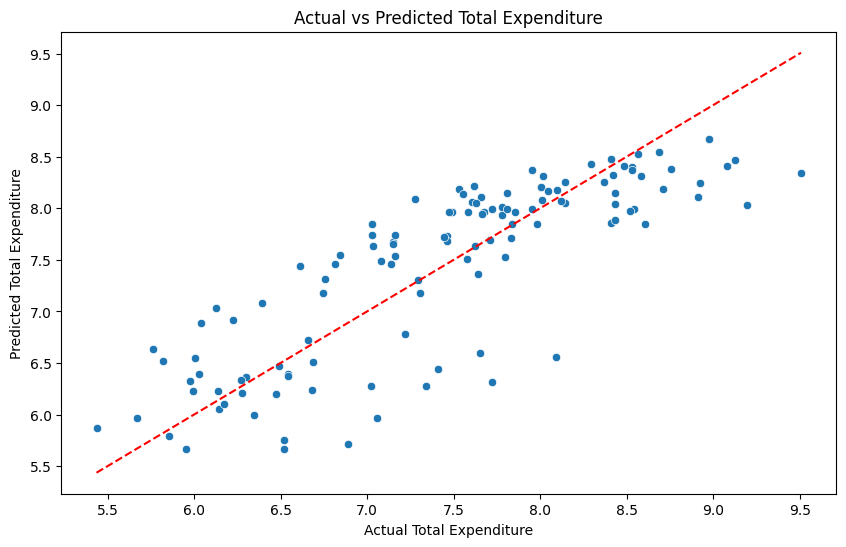

In [56]:
# Vẽ biểu đồ Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=pred)
plt.xlabel('Actual Total Expenditure')
plt.ylabel('Predicted Total Expenditure')
plt.title('Actual vs Predicted Total Expenditure')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

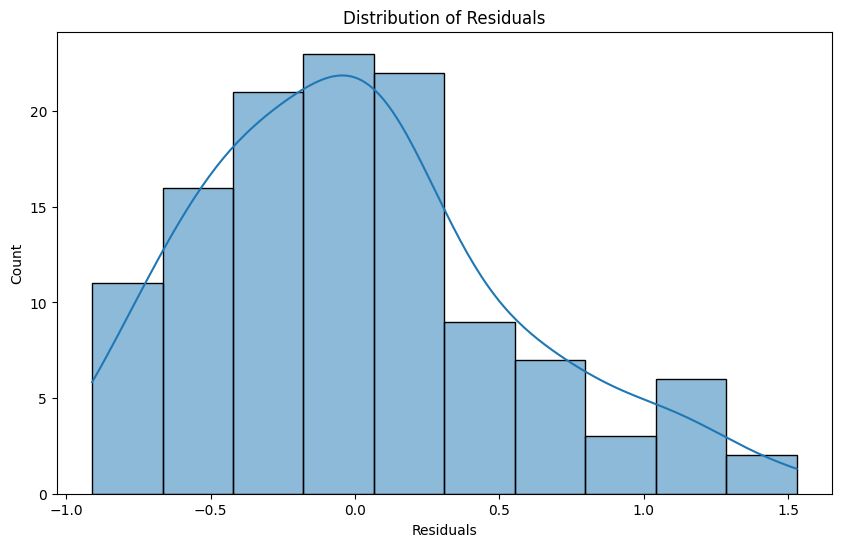

In [58]:
# Vẽ biểu đồ phân phối phần dư
residuals = y_test - pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [54]:
# Tính toán lỗi
error = pred - y_test

# Tính RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE:", rmse)

RMSE: 0.5312871790245879


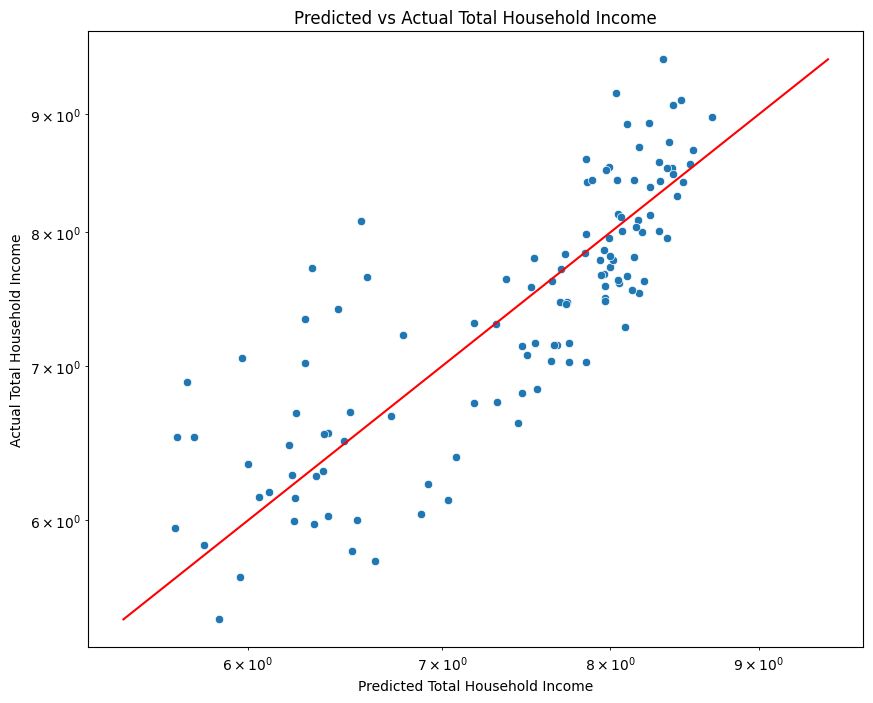

In [55]:
# Plot the predictions (on the x-axis) against the outcome (cty) on the test data
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pred, y=y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Predicted Total Household Income')
plt.ylabel('Actual Total Household Income')
plt.title('Predicted vs Actual Total Household Income')
plt.show()